# Problem 6: Climate Change

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The file *climate_change.csv* contains climate data from May 1983 to December 2008.

In [2]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/climate_change.csv'
data = pd.read_csv(url)
data

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


**Data Description**

| Feature | Description |
| :- | -: |
| Year | the observation year |
| Month | the observation month |
| MEI | multivariate El Nino Southern Oscillation index (MEI), a measure of the strength of the El Nino/La Nina-Southern Oscillation (a weather effect in the Pacific Ocean that affects global temperatures) |
| CO2 | atmospheric concentrations of carbon dioxide (CO2) |
| CH4 | atmospheric concentrations of methane  (CH4) |
| N2O | atmospheric concentrations of nitrous oxide (N2O) |
| CFC.11 | atmospheric concentrations of trichlorofluoromethane (CCl3F; commonly referred to as CFC-11)
| CFC.12 | atmospheric concentrations of dichlorodifluoromethane (CCl2F2; commonly referred to as CFC-12)
| TSI | the total solar irradiance (TSI) in W/m2 (the rate at which the sun's energy is deposited per unit area). Due to sunspots and other solar phenomena, the amount of energy that is given off by the sun varies substantially with time|
| Aerosols | the mean stratospheric aerosol optical depth at 550 nm. This variable is linked to volcanoes, as volcanic eruptions result in new particles being added to the atmosphere, which affect how much of the sun's energy is reflected back into space |
| Temp | the difference in degrees Celsius between the average global temperature in that period and a reference value |

Text(0, 0.5, 'Temperature')

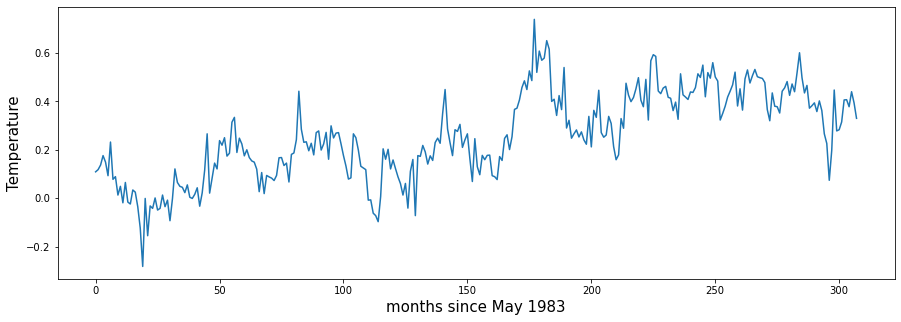

In [3]:
y = data['Temp'].to_numpy()
plt.figure(figsize=(15,5))
plt.plot(y)
plt.xlabel('months since May 1983',fontsize=15)
plt.ylabel('Temperature',fontsize=15)

The **goal** is to fit a linear regression model to predict the variable Temp, using MEI, CO2, CH4, N2O, CFC.11, CFC.12, TSI, and Aerosols (Year and Month should NOT be used in the model)

## Fitting a Linear Model

In [8]:
m = len(data)
m

308

In [21]:
features = ['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI','Aerosols']
X = data[features].to_numpy()
X = np.c_[np.ones(m),X] # add bias

In [40]:
# fit a linear model to the data
theta = np.linalg.solve(X.T.dot(X),X.T.dot(y))

In [23]:
# use the linear model to predict the vector y
y_pred = X.dot(theta)

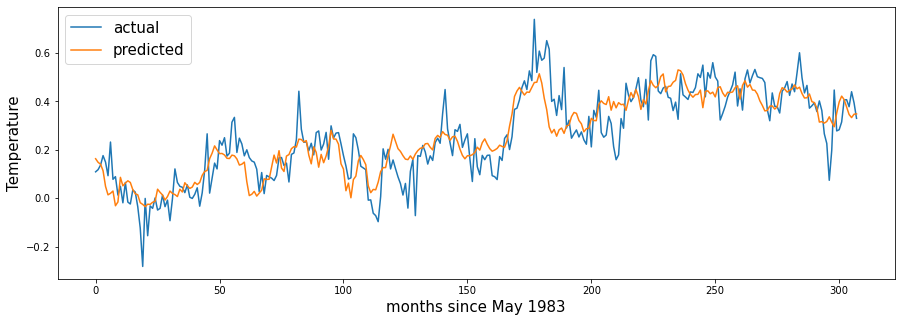

In [24]:
plt.figure(figsize=(15,5))
plt.plot(y, label='actual')
plt.plot(y_pred, label='predicted')
plt.xlabel('months since May 1983',fontsize=15)
plt.ylabel('Temperature',fontsize=15)
plt.legend(fontsize=15)

## Fitting a Polynomial Model

In [25]:
X = data[features].to_numpy()
m, n = X.shape

In [26]:
# scale the data
means = X.mean(axis=0) # mean along rows (axis=0)
s = X.std(axis=0) # standard deviation along rows
X = (X-means)/s # remove the mean and scale to unit variance

In [27]:
from itertools import chain
from itertools import combinations_with_replacement as comb_w_r

In [34]:
# number of polynomial features
degree = 3
combinations  = chain.from_iterable(comb_w_r(range(n), i) for i in range(1, degree+1))
n_poly = sum(1 for comb in combinations)
n_poly

164

In [35]:
# polynomial features
combinations  = chain.from_iterable(comb_w_r(range(n), i) for i in range(1, degree+1))
XP = np.ones((m,n_poly))
for col_idx,combination in enumerate(combinations):  
    for idx in combination:
        XP[:,col_idx]= XP[:,col_idx]*X[:,idx]

In [36]:
# add bias
XP = np.c_[np.ones(m),XP]

In [37]:
# fit a linear model to the data
theta = np.linalg.solve(XP.T.dot(XP),XP.T.dot(y))

In [38]:
# use the linear model to predict the vector y
y_pred = XP.dot(theta)

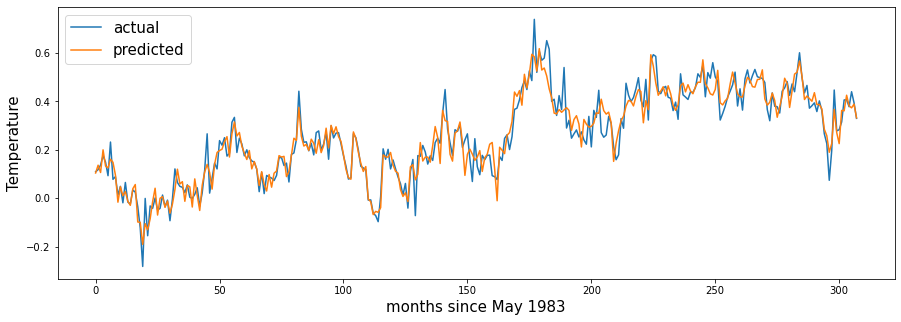

In [39]:
plt.figure(figsize=(15,5))
plt.plot(y, label='actual')
plt.plot(y_pred, label='predicted')
plt.xlabel('months since May 1983',fontsize=15)
plt.ylabel('Temperature',fontsize=15)
plt.legend(fontsize=15)